In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [110]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
train_label = pd.read_csv('train_label.csv')


train_data  = train_data.iloc[:50000,:]
train_label = train_label.iloc[:50000,:]
print(train_data.shape)
print(train_label.shape)


In [16]:
fea = ['Function','Use','Sharing','Reporting','Student_Type','Position_Type','Object_Type','Pre_K','Operating_Status']


In [23]:
unique_label = raw_data[fea].apply(pd.Series.nunique)
unique_label

Function            37
Use                  8
Sharing              5
Reporting            3
Student_Type        10
Position_Type       25
Object_Type         11
Pre_K                3
Operating_Status     3
dtype: int64

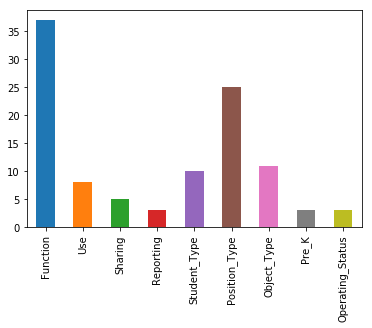

In [27]:
unique_label.plot(kind='bar')

In [115]:
def compute_log_loss( predicted , actual , eps = 1e-14):
    predicted = np.clip(predicted,eps,1-eps)  # Biclass log
    loss = -1 * np.mean (actual * np.log(predicted) + (1-actual)*np.log(1-predicted))
    return loss
print(compute_log_loss(predicted=1,actual=0))
print(compute_log_loss(predicted=1,actual=1))


32.236990899346836
9.99200722162646e-15


4555

In [121]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = train_data[['Total','FTE']].fillna(-1000)

In [82]:
# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(raw_data[fea])

In [84]:
from sklearn.model_selection import train_test_split

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [123]:
clf = OneVsRestClassifier(LogisticRegression())

In [175]:
text_data = train_data.drop(['Unnamed: 0','Total','FTE'],axis=1).fillna('')

In [176]:
text_data = text_data.apply(lambda x: " ".join(x), axis=1)

In [153]:
from sklearn.feature_extraction.text import CountVectorizer

In [157]:
# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform vec_basic
vec_basic.fit_transform(text_data)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_data)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 44 tokens in the dataset
There are 41 alpha-numeric tokens in the dataset


In [180]:
from sklearn.pipeline import Pipeline

In [185]:
# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(text_data,train_label.drop('Unnamed: 0',axis=1))

Pipeline(memory=None,
     steps=[('vec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [189]:
# Compute and print accuracy
accuracy = pl.score(text_data,train_label.drop('Unnamed: 0',axis=1))
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.8353


In [192]:
pd.DataFrame(pl.predict_proba(text_data))

0             1             2             3             4    \
0      5.482119e-04  4.772580e-04  2.988166e-04  2.714703e-04  1.665180e-04   
1      8.958757e-05  1.771380e-03  5.204801e-05  1.237313e-04  6.364670e-04   
2      3.136462e-04  3.836246e-05  6.938418e-05  4.903141e-05  5.323714e-05   
3      3.366417e-08  6.767653e-05  8.996123e-06  2.945827e-03  5.811116e-06   
4      5.642393e-07  1.233044e-05  4.787437e-07  2.062546e-06  2.126842e-07   
5      1.855107e-03  1.940949e-03  7.111848e-04  3.070497e-03  1.539979e-03   
6      2.420951e-02  4.498213e-05  7.816269e-06  2.785326e-05  3.876347e-05   
7      1.297820e-03  7.698382e-04  1.217485e-04  1.605098e-02  1.260130e-03   
8      3.123701e-04  3.254281e-05  2.137101e-05  3.657947e-05  1.343477e-04   
9      1.025778e-06  1.460739e-05  6.887922e-06  4.943269e-04  2.030547e-05   
10     7.583455e-05  1.736495e-03  3.804181e-04  1.486356e-04  3.052825e-04   
11     4.539836e-04  4.798780e-04  2.712656e-04  2.531766e-04  2.989957e-04   
12     5.039450e-04  7.719212e-08  6.967624e-05  2.558239e-05  4.874024e-05   
13     9.766120e-04  5.762983e-04  1.727092e-05  1.858885e-05  8.631927e-05   
14     3.563813e-07  4.512623e-06  7.168014e-05  7.800825e-06  7.683436e-05   
15     1.079546e-06  1.036354e-06  1.079667e-06  4.414307e-06  1.599280e-05   
16     5.731239e-05  1.364616e-06  3.109936e-05  3.345723e-06  4.051676e-06   
17     2.656560e-07  2.742747e-05  5.774418e-05  4.979612e-04  3.238911e-04   
18     7.064962e-05  1.519371e-04  5.781747e-05  7.742732e-04  1.173150e-03   
19     2.749682e-05  1.492932e-05  5.073092e-04  6.138000e-02  1.262780e-03   
20     7.828391e-06  1.776160e-04  2.373107e-03  4.906296e-04  1.640070e-04   
21     2.991889e-07  9.864665e-06  2.711655e-06  6.099775e-04  1.754341e-06   
22     1.188165e-05  2.479306e-04  1.249127e-05  7.487060e-07  1.243188e-05   
23     4.224935e-06  1.375465e-03  6.522447e-04  1.905827e-05  7.882532e-05   
24     2.122398e-05  2.796510e-05  5.453052e-05  2.038271e-06  2.626973e-05   
25     6.394135e-04  1.307578e-05  1.348972e-05  4.777520e-06  1.080407e-04   
26     3.359102e-05  3.789950e-05  4.200520e-04  2.015583e-01  3.326275e-04   
27     7.723843e-07  2.722673e-04  5.351647e-05  3.619219e-03  1.111592e-05   
28     4.903716e-04  2.937811e-05  1.063924e-05  8.993824e-05  1.315511e-04   
29     7.256687e-07  1.149690e-04  5.646744e-05  2.221463e-05  3.441645e-06   
...             ...           ...           ...           ...           ...   
49970  4.844092e-07  2.746802e-05  4.298632e-05  1.686810e-07  2.011784e-06   
49971  9.686912e-02  1.101116e-04  4.713048e-05  3.801377e-05  7.196851e-03   
49972  5.244319e-06  2.417053e-05  5.680776e-05  2.239649e-02  4.633611e-05   
49973  1.342659e-03  9.071516e-04  1.576193e-03  9.866884e-01  9.472931e-04   
49974  1.210612e-06  2.574380e-04  1.974370e-04  3.932841e-05  1.279987e-05   
49975  5.004853e-08  3.187356e-05  5.673657e-06  9.403995e-07  6.302697e-06   
49976  5.929239e-09  2.033690e-05  1.626422e-06  2.433673e-02  1.979976e-06   
49977  5.006025e-06  1.100319e-04  1.285074e-04  4.356215e-04  2.165999e-06   
49978  1.097815e-05  5.562888e-06  6.617539e-05  6.141429e-03  1.555390e-03   
49979  2.321547e-04  2.747203e-05  1.851581e-05  1.825518e-05  1.209996e-04   
49980  3.687766e-07  4.971100e-07  5.128021e-06  1.045082e-04  7.674346e-07   
49981  1.419253e-04  2.200464e-03  2.537885e-05  8.677167e-04  3.175329e-03   
49982  1.451450e-03  7.740438e-04  1.245263e-04  2.142466e-02  8.622061e-04   
49983  5.239725e-04  4.145834e-05  2.601485e-05  8.238738e-04  1.372768e-04   
49984  4.857152e-09  6.254940e-06  1.705325e-05  2.217996e-06  6.079441e-06   
49985  1.047862e-03  1.675140e-04  1.046716e-05  1.841566e-02  2.918750e-03   
49986  1.779403e-04  8.375275e-05  3.558298e-04  1.198909e-02  1.391922e-04   
49987  6.295806e-05  8.674199e-04  1.736493e-05  6.757222e-05  3.371756e-05   
49988  7.145497e-05  3.763232e-04  1.392789e-04  1.123005e-04  5.9